In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#import argparse

In [4]:
# parser = argparse.ArgumentParser(description='TATA_enrichment_plots')
# parser.add_argument('file_names', type=str, help='Name of folder and filenames for the promoters extracted')
# parser.add_argument('gat_TATA_constitutive_output', type=str, help='Location of constitutive promoter gat analysis output')
# parser.add_argument('gat_TATA_variable_output', type=str, help='Location of variable promoter gat analysis output')
# parser.add_argument('output_prefix', type=str, help='Output prefix to add to plot file name')

# args = parser.parse_args()

In [5]:
file_names = 'non-overlapping_includingbidirectional_all_genes_newannotation'
gat_TATA_constitutive_output = f'../../data/output/{file_names}/TATA/gat_analysis/gat_promoters_5UTR_Czechowski_TATA_constitutive.out'
gat_TATA_variable_output = f'../../data/output/{file_names}/TATA/gat_analysis/gat_promoters_5UTR_Czechowski_TATA_variable.out'
output_prefix = 'Czechowski_promoters_5UTR'

In [8]:
def create_plot(gat_TATA_constitutive_output,gat_TATA_variable_output):
    """import and process the raw outputs after running gat (Genomic association tester). Then create barplot of constitutive and variable gene TATA enrichment"""
    #import gat output files as dfs
    constitutive = pd.read_table(gat_TATA_constitutive_output, sep='\t', header=0)
    variable = pd.read_table(gat_TATA_variable_output, sep='\t', header=0)
    #merge dfs
    merged = pd.concat([constitutive,variable], ignore_index=True)
    print(merged)
    #set style to ticks
    sns.set(style="ticks", color_codes=True)
    #bar chart, 95% confidence intervals
    plot = sns.barplot(x="annotation", y="l2fold", data=merged)
    plot.axhline(0, color='black')
    plt.xlabel("Gene type")
    plt.ylabel("Log2-fold enrichment over background").get_figure().savefig(f'../../data/output/{file_names}/TATA/plots/{output_prefix}_log2fold.pdf', format='pdf')

    track    annotation  observed  expected  CI95low  CI95high   stddev  \
0  merged  constitutive       969  1082.713    943.0    1224.0  86.9772   
1  merged      variable      1167  1053.562    907.0    1196.0  86.5382   

     fold  l2fold  pvalue  ...  annotation_nsegments  annotation_size  \
0  0.8951 -0.1599   0.095  ...                   100           110793   
1  1.1076  0.1474   0.095  ...                   100           106948   

   annotation_density  overlap_nsegments  overlap_size  overlap_density  \
0              50.883                 65           969          0.44502   
1              49.117                 78          1167          0.53596   

   percent_overlap_nsegments_track  percent_overlap_size_track  \
0                          45.4545                     45.1748   
1                          54.5455                     54.4056   

   percent_overlap_nsegments_annotation  percent_overlap_size_annotation  
0                                  65.0               

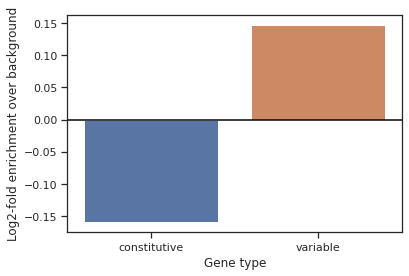

In [9]:
#Create barplot
create_plot(gat_TATA_constitutive_output,gat_TATA_variable_output)